https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html

In [1]:
import numpy as np
from qiskit import QuantumCircuit

In [17]:
!pip install 'qiskit[visualization]'
!pip install qiskit-aer 

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

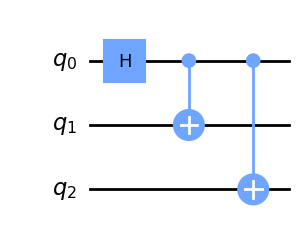

In [10]:
circ.draw('mpl', style='clifford')

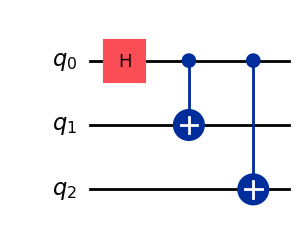

In [11]:
circ.draw('mpl', style='iqp')

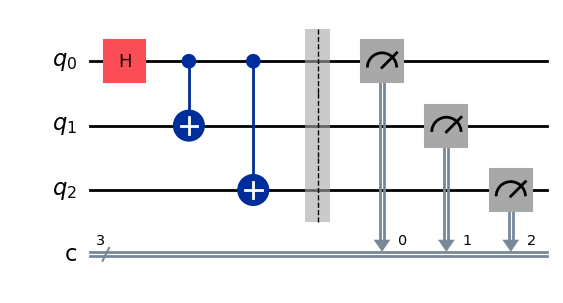

In [15]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before)
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(3), front=True)

#drawing the circuit
qc.draw('mpl', style='iqp')

In [18]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [19]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'000': 521, '111': 503}


# Circuit Basics

In [20]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [21]:
# Add a H gate on qubit $q_{0}$, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{1}$, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit $q_{0}$ and target qubit $q_{2}$, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

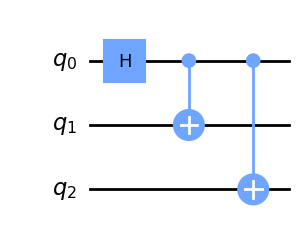

In [22]:
circ.draw('mpl', style='clifford')

In [23]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [25]:
# Create a Quantum Program for execution
job = backend.run(circ)
result = job.result()

outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


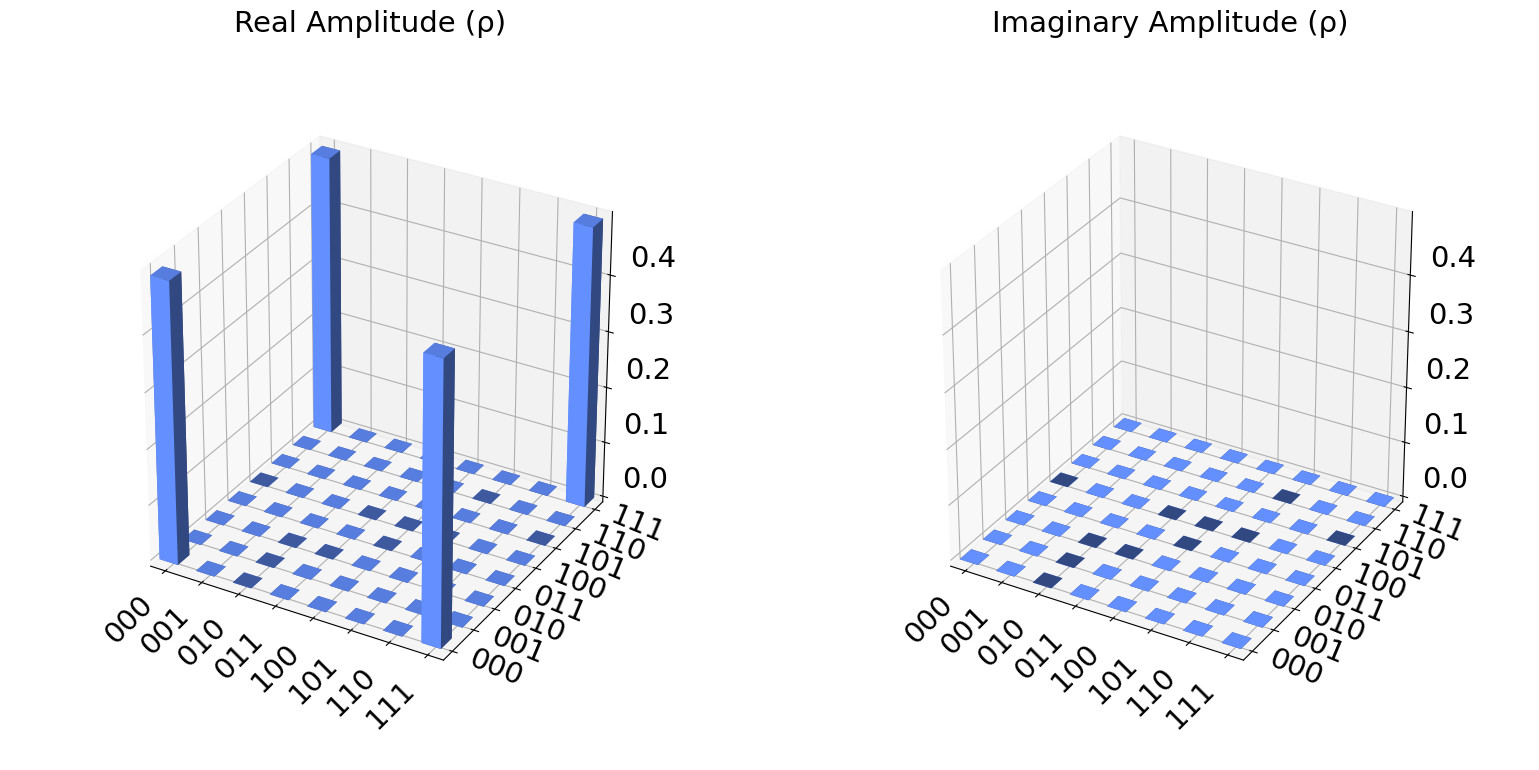

In [26]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [27]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the compose method.
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

#drawing the circuit
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

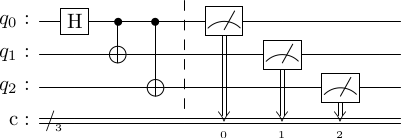

In [35]:
qc.draw('latex', style='iqp')

In [1]:
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [3]:
q = QuantumRegister(1)

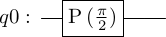

In [4]:
qc = QuantumCircuit(q)
qc.p(pi/2,q)
qc.draw('latex', style='iqp')

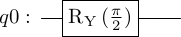

In [5]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw('latex', style='iqp')

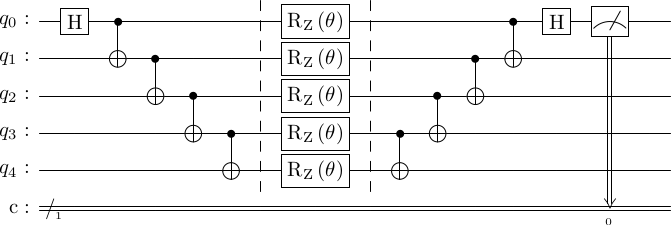

In [9]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('latex', style='iqp')

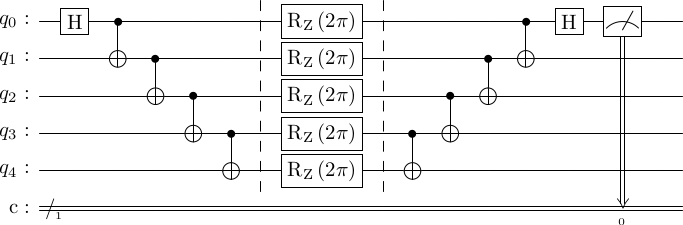

In [12]:
import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.assign_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw('latex', style='iqp')

In [13]:
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuits, backend))
counts = job.result().get_counts()

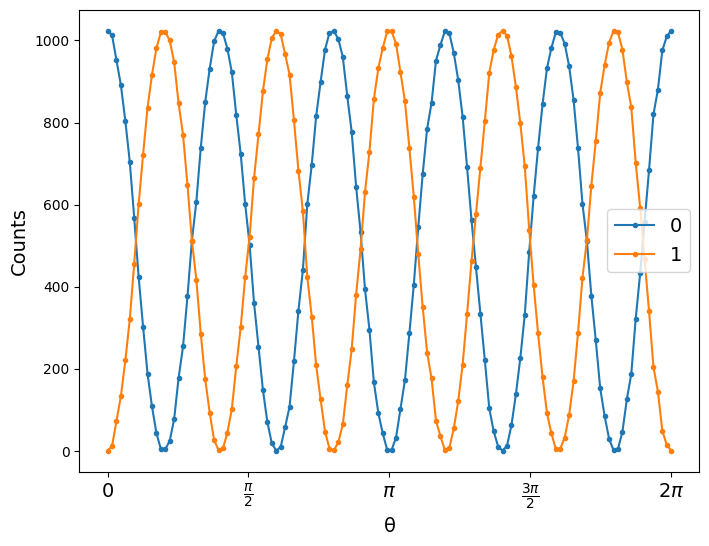

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

# Configuration

In [15]:
config = backend.configuration()

# Basic Features
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called qasm_simulator, and is on version 2.1.0. It has 24 qubits. It does not support OpenPulse programs. The basis gates supported on this device are ['h', 'u', 'p', 'u1', 'u2', 'u3', 'rz', 'sx', 'x', 'cx', 'id', 'unitary'].


# Quantum Eraser

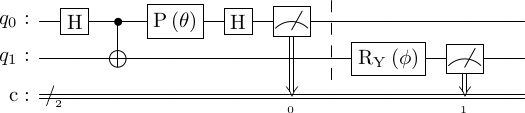

In [11]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.circuit import Parameter

theta = Parameter('θ')
phi = Parameter('ϕ')

qc = QuantumCircuit(2, 2)

# Bell pair
qc.h(0)
qc.cx(0,1)

# phase for path difference
qc.p(theta, 0)

# combine two path
qc.h(0)

# measure 
qc.measure(0, 0)
qc.barrier()

# erase or not
qc.ry(phi, 1)
qc.measure(1, 1)

qc.draw('latex', style='iqp')

In [12]:
import numpy as np

theta_range = np.linspace(-5 * np.pi, 5 * np.pi, 128)
n_shots = 1024 # default value

backend = BasicAer.get_backend('qasm_simulator')

circuits = [qc.assign_parameters({theta: theta_val, phi: 0})
            for theta_val in theta_range]
job = backend.run(transpile(circuits, backend))

counts = job.result().get_counts()

circuits = [qc.assign_parameters({theta: theta_val, phi: np.pi/2})
            for theta_val in theta_range]
job = backend.run(transpile(circuits, backend))

counts2 = job.result().get_counts()


In [13]:
x = list(map(lambda c: (c.get('00', 0)+c.get('11', 0))/n_shots, counts))
x_erase = list(map(lambda c: (c.get('00',0)+c.get('11', 0))/n_shots, counts2))

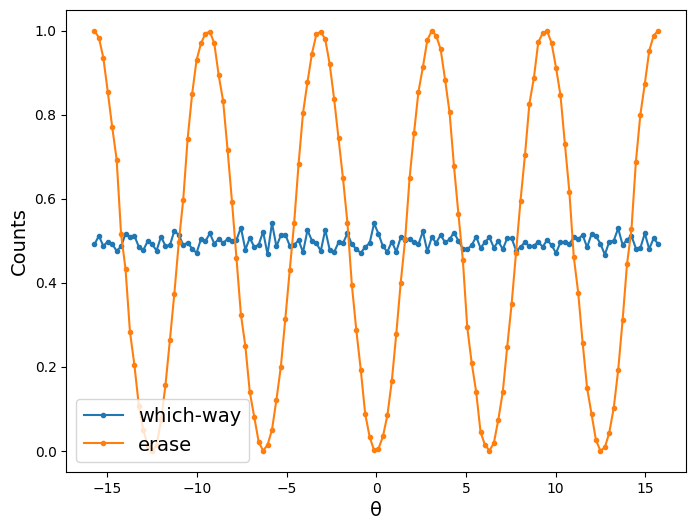

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, x, '.-', label='which-way')
ax.plot(theta_range, x_erase, '.-', label='erase')

#ax.set_xticks([i * np.pi / 2 for i in range(5)])
#ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)
plt.show()

# Bell's inequality

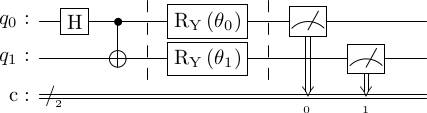

In [25]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit.circuit import Parameter

theta0 = Parameter('θ_0')
theta1 = Parameter('θ_1')

qc = QuantumCircuit(2, 2)

# Bell pair
qc.h(0)
qc.cx(0,1)

qc.barrier()

# phase for path difference
qc.ry(theta0, 0)
qc.ry(theta1, 1)

qc.barrier()

# measure 
qc.measure(0, 0)
qc.measure(1, 1)

qc.draw('latex', style='iqp')

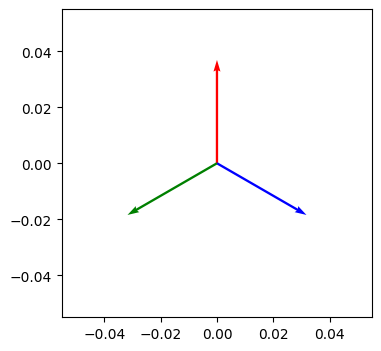

In [54]:
import numpy as np

theta_ry = np.array([0., 2*np.pi/3, -2*np.pi/3])

init_vector = np.array([0., 1.])

Ry = np.array( [ [ np.cos(theta_ry), np.sin(theta_ry)],
                  [-np.sin(theta_ry), np.cos(theta_ry)] ] )
Ry = np.transpose(Ry, (2,0,1))
measure_vec = np.dot(Ry, init_vector)

measure1 = measure_vec[0]
measure2 = measure_vec[1]
measure3 = measure_vec[2]

import matplotlib.pyplot as plt

def draw_vector(v1, v2, v3):
    V = np.array([[v1[0],v1[1]],
                  [v2[0],v2[1]],
                  [v3[0],v3[1]]])
    origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

    plt.figure(figsize=(4,4))
    plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=3)
    plt.show()

draw_vector(measure1, measure2, measure3)

In [55]:
import numpy as np

theta_ry = [0, 2*np.pi/3, -2*np.pi/3]
theta_range = [(theta_ry[0], theta_ry[1]), (theta_ry[1], theta_ry[2]), (theta_ry[0], theta_ry[2])]
n_shots = 4096 # default value

backend = BasicAer.get_backend('qasm_simulator')

circuits = [qc.assign_parameters({theta0: angle0, theta1: angle1})
            for angle0, angle1 in theta_range]
job = backend.run(transpile(circuits, backend), shots=n_shots)

counts = job.result().get_counts()

In [56]:
counts

[{'11': 521, '10': 1561, '01': 1504, '00': 510},
 {'00': 521, '01': 1539, '10': 1532, '11': 504},
 {'01': 1592, '11': 501, '10': 1494, '00': 509}]

In [57]:
P12_same = (counts[0].get('00',0) + counts[0].get('11'))/n_shots
P23_same = (counts[1].get('00',0) + counts[1].get('11'))/n_shots
P13_same = (counts[2].get('00',0) + counts[2].get('11'))/n_shots

print('P12_same =', P12_same)
print('P23_same =', P23_same)
print('P13_same =', P13_same)
if P12_same + P23_same + P13_same < 1:
    print('P12 + P23 + P13 =', P12_same+P23_same+P13_same, ' < 1')
    print("Bell's inequality violated.")
else:
    print('P12 + P23 + P13 =', P12_same+P23_same+P13_same, ' >= 1')
    print("Bell's inequality satisfied.")

P12_same = 0.251708984375
P23_same = 0.250244140625
P13_same = 0.24658203125
P12 + P23 + P13 = 0.74853515625  < 1
Bell's inequality violated.
